In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from uedge import *
from uedge.hdf5 import *
#import plotmesh as pm
from uetools import Case
from uedge.gridue import write_gridue
from Forthon import gchange

UEDGE configuration file /Users/paullab/.uetoolsrc read.


In [2]:
c = Case('reconverged_FINAL_v12_p3.93_n2.38_imp4e2_dp0.06_kep0.06_kip0.0226_last_ii2.hdf5')

Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../jupyter/MANTA_final_baseline/reconverged_FINAL_v12_p3.93_n2.38_imp4e2_dp0.06_kep0.06_kip0.0226_last_ii2.hdf5
  User-specified diffusivities read from HDF5 file ".../jupyter/MANTA_final_baseline/reconverged_FINAL_v12_p3.93_n2.38_imp4e2_dp0.06_kep0.06_kip0.0226_last_ii2.hdf5"
UETOOLS-style save successfully restored from .../jupyter/MANTA_final_baseline/reconverged_FINAL_v12_p3.93_n2.38_imp4e2_dp0.06_kep0.06_kip0.0226_last_ii2.hdf5
*** For isimpon=2, set afracs, not afrac ***

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 1.65e+00



In [4]:
# HOPEFULLY GLOBAL PLOT SETTINGS
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.titlesize'] = 22
# plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

Text(0.5, 0.01, 'Distance along outer plate (m)')

# Midplane plots

# Plate plots

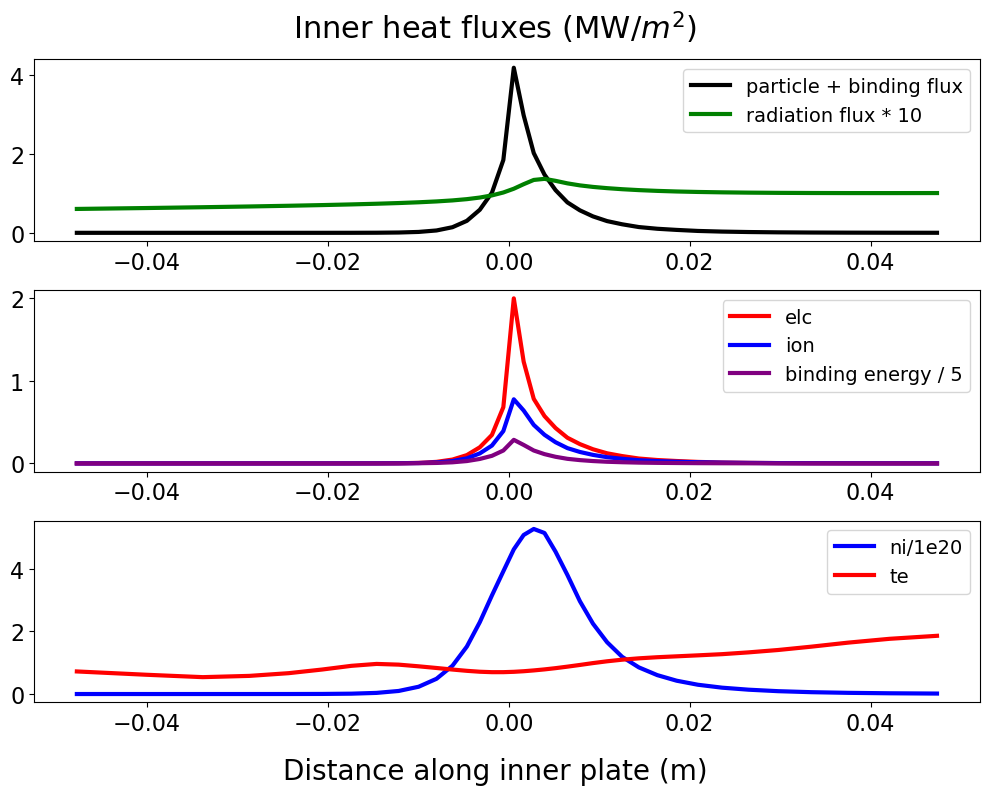

In [46]:
left_index = 2  # Adjust this as needed
right_index = -7 # Adjust this as needed

fig, axs = plt.subplots(3, figsize=(10,8))
bbb.fqp = 0
bbb.plateflux()  # Internally calculated fluxes (postprocessing)
fig.suptitle('Inner heat fluxes (MW/$m^2$)')
fig.supxlabel('Distance along inner plate (m)', fontsize=20)

# Truncate data between left_index and right_index
x = com.yylb[left_index:right_index]  # Adjust yylb slicing
axs[0].plot(com.yylb[left_index:right_index], 1.e-6*(bbb.sdtlb[left_index:right_index]), label='particle + binding flux', color='0')
axs[0].plot(com.yylb[left_index:right_index], 1.e-6*(bbb.sdrlb[left_index:right_index])*10, label='radiation flux * 10', color='g')
# axs[0].plot(com.yyrb[left_index:right_index], 1.e-6*bbb.sdrrb[left_index:right_index]*10, label='tot rad flx*10')
axs[0].legend(fontsize=14)

# For the second plot, slice arrays accordingly
axs[1].plot(x, bbb.sdelb[left_index:right_index]*1e-6, '-r', label='elc')
axs[1].plot(x, bbb.sdilb[left_index:right_index]*1e-6, '-b', label='ion')
axs[1].plot(x, bbb.sbindlb[left_index:right_index,:]*1e-6/5, color='purple', label='binding energy / 5')
axs[1].legend(fontsize=14)

# For the third plot, slice arrays accordingly
axs[2].plot(x, bbb.ni[com.nx+1,left_index:right_index,0]/1e20, '-b', label='ni/1e20')
axs[2].plot(x, bbb.te[com.nx+1,left_index:right_index]/bbb.ev, '-r', label='te')
axs[2].legend(fontsize=14)

plt.tight_layout()

# Save and show the plot
plt.savefig('inner_div_plot.png')
plt.show()

2 64


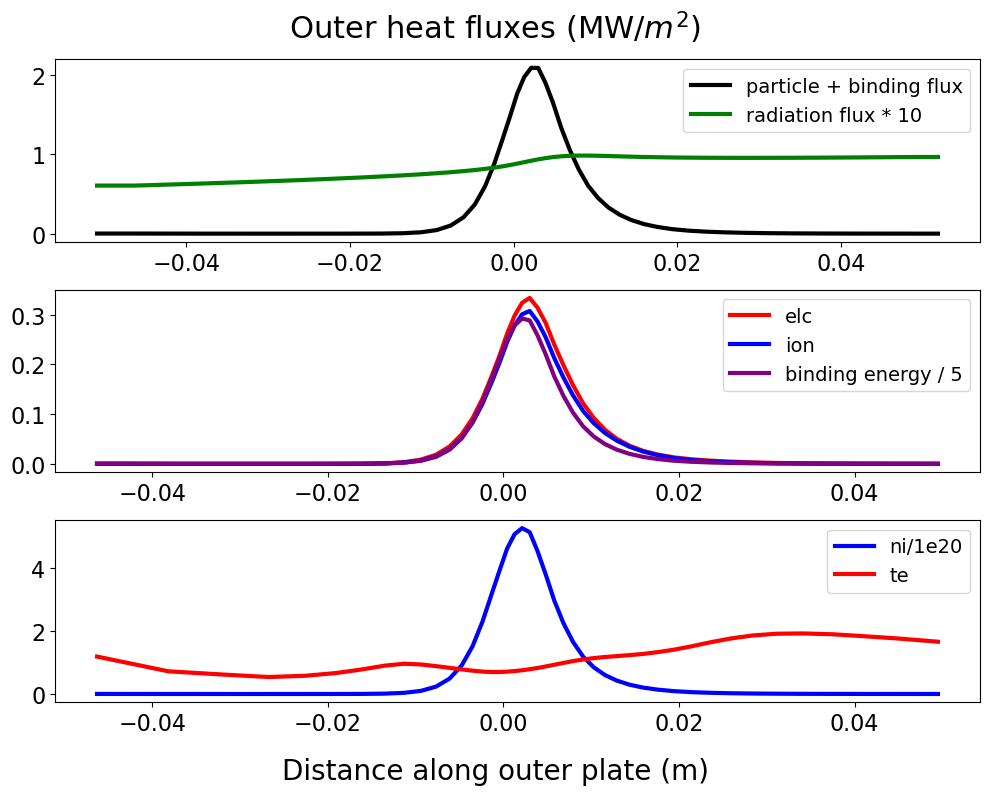

46

In [47]:
fig, axs = plt.subplots(3, figsize=(10,8))
bbb.fqp=0
bbb.plateflux(); #internally calculated fluxes (postprocessing)
fig.suptitle('Outer heat fluxes (MW/$m^2$)')
fig.supxlabel('Distance along outer plate (m)', fontsize=20)
x = com.yyrb[1:-1]
axs[0].plot(com.yyrb,1.e-6*(bbb.sdtrb), label='particle + binding flux', color='0')
axs[0].plot(com.yyrb,1.e-6*(bbb.sdrrb)*10, label='radiation flux * 10', color='g')
# axs[0].plot(com.yyrb,1.e-6*bbb.sdrrb*10, label='tot rad flx*10')
axs[0].legend(fontsize=14)
# axs[0].plot(com.yylb,1.e-6*bbb.sbindrb)
axs[1].plot(x, bbb.sderb[1:-1]*1e-6, '-r', label='elc')
axs[1].plot(x, bbb.sdirb[1:-1]*1e-6, '-b', label='ion')
axs[1].plot(x, bbb.sbindrb[1:com.ny+1,:]*1e-6/5, color='purple', label='binding energy / 5')
print(com.nisp,com.nx)
# axs[2].plot(x, bbb.engirb[1:com.ny+1,com.nisp-1,com.nxpt-1], '--r', label='ave ion energy')
# axs[2].plot(com.yylb, bbb.pwr_pltz[0:ny+1,2*nxpt), '--b', label='rad')
axs[1].legend(fontsize=14)
axs[2].plot(x, bbb.ni[com.nx+1,1:-1,0]/1e20, '-b', label='ni/1e20')
axs[2].plot(x, bbb.te[com.nx+1,1:-1]/bbb.ev, '-r', label='te')
axs[2].legend(fontsize=14)
plt.tight_layout()
# axs[3].plot(x, bbb.sbindrb[1:com.ny+1,:]*1e-6, '-r', label='binding energy')
# axs[3].plot(x, bbb.pradhyd[com.nx+1,1:-1]/1e7, '-b', label='prad by hyd * 1e-7')
# axs[3].legend()
plt.savefig('outer_div_plot.png')
plt.show()
com.yyrb.size